In [14]:
import numpy as np
from matplotlib import pyplot
from matplotlib import pyplot as plt

## Sampling Gaussian Probabilities
Sampling Gaussian Probabilities is a fun task. It can be attempted my multiple ways. The MCMC method presented here will later be used in the project to estimate expectation values of the Hamiltonian.

### 1. By Direct Sampling

By analytical means, sapling normal gaussians corresponds to sampling $\phi$ uniformly from $[0,\pi/2]$ and z from $[0, 1]$ and applying the following coordinate transform:

$$
r = \sqrt{-2\log{1-z}}
$$

then, two gaussian samples $x$ and $y$ are obtained by:

$$
x = r \cos{\phi} \\
y = r \sin{\phi}
$$

In [24]:
N = 500

# sample phis:

phi = np.random.uniform(size = N) * 2 * np.pi
z = np.random.uniform(size = N)

In [25]:
x = np.sqrt(-2*np.log(1-z))*np.cos(phi)
y = np.sqrt(-2*np.log(1-z))*np.sin(phi)

Text(0.5, 1.0, 'Wonderful Gaussian Samples')

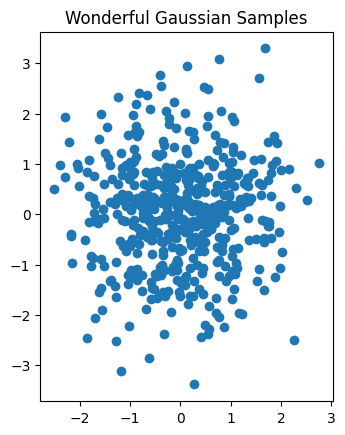

In [26]:
plt.gca().set_aspect('equal')
plt.scatter(x, y)
plt.title("Wonderful Gaussian Samples")

### 2. By utilising a Markov-Chain Monte-Carlo Algorithmn

In [194]:
def sample(f, N, x_0, u_x = 1,  verbose = False):
    x_0 = np.array(x_0)
    samples = [x_0]
    shape = x_0.shape
    success_rate = 1

    for i in range(1, N):
        # sample gaussian step
        dx = np.random.randn(*shape) * u_x
        # calculate proposal
        proposal = samples[-1] + dx

        # calculate acceptance ratio
        accept_ratio = f(proposal)/f(samples[-1])

        # bring about a judge
        damocles = np.random.uniform()

        if damocles < accept_ratio:
            samples.append(proposal)
            success_rate = (success_rate * (i - 1) + 1) / i
        else:
            samples.append(samples[-1])
            success_rate = success_rate * (i - 1) / i

    if verbose:
        print("success rate:", success_rate)

    return np.array(samples)


In [228]:
f = lambda x: np.exp(-0.5*np.sum(x**2)/2)

samples = sample(f, 3000, [0,0,0], u_x = 1, verbose = True)

success rate: 0.5768589529843278


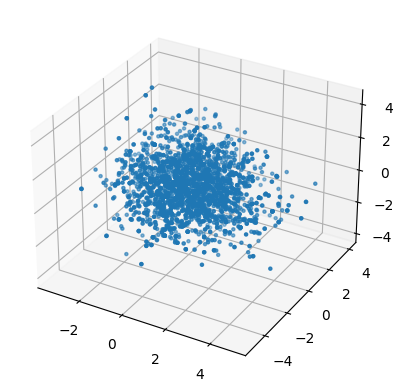

In [229]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], marker = ".")